In [20]:
%load_ext autoreload
%autoreload 2
from methods2final import * 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
df = pd.read_csv("../dat/GSE104276_all_pfc_2394_UMI_TPM_NOERCC.csv")
exp_mat = df.drop("GENE", axis=1).transpose()
print(exp_mat.shape)
exp_mat.head(3)

(2394, 24153)


,0,1,2,3,4,5,6,7,8,9,...,24143,24144,24145,24146,24147,24148,24149,24150,24151,24152
GW08_PFC1_sc1,4.54,0.0,0.0,4.54,0.0,0.0,0.0,0.0,4.54,0.0,...,4.54,4.54,0.0,0.0,45.4,0.0,4.54,0.00,0.0,0.0
GW08_PFC1_sc2,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,...,0.00,81.19,0.0,0.0,0.0,0.0,108.25,0.00,0.0,0.0
GW08_PFC1_sc3,0.00,0.0,0.0,8.87,0.0,0.0,0.0,0.0,0.00,0.0,...,124.25,0.00,0.0,0.0,0.0,0.0,8.87,124.25,0.0,35.5


In [25]:
X_embedded = TSNE(n_components=2).fit_transform(exp_mat)
X_embedded.shape

(2394, 2)

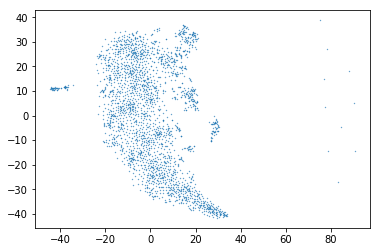

In [26]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], cmap=plt.cm.Spectral, s=0.1)